In [ ]:
"""
RRT - gebrtae random points near latest node and goal
and added unit directrion vector to point towards the goal
draw backs:-  if start(node), obstacle and goal are collinear collision happens

"""


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

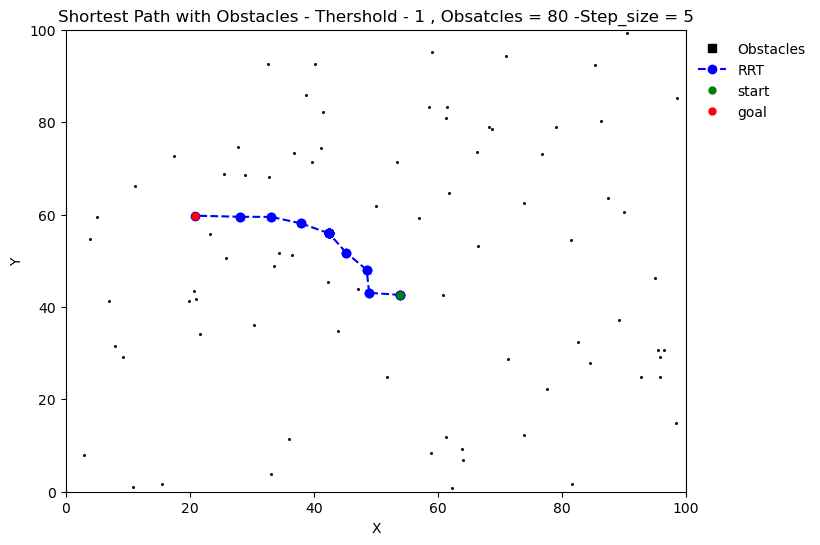

In [4]:
OBSTACLE_THRESHOLD = 1
GRID_SIZE = 100
NUM_OBSTACLES = 80
step_size_t = 5
Max_iter = 20000
# Generate random obstacles
obstacles = np.random.rand(NUM_OBSTACLES, 2) * GRID_SIZE
START_RANGE = (0, GRID_SIZE)
GOAL_RANGE = (0, GRID_SIZE)
# Generate random start and goal points 
start = np.random.uniform(START_RANGE[0], START_RANGE[1], size=2)
goal = np.random.uniform(GOAL_RANGE[0], GOAL_RANGE[1], size=2)
# start = np.array([80, 50])
# goal = np.array([80, 10])
# obstacles[3] = np.array([80,30])


"""
function to genrate random  points near the specified location
"""

def generate_random_point(latest_node,goal,max_offset = step_size_t):
    
    off_set = np.random.rand(2) * max_offset
    direction_vect = goal - latest_node
    unit_direct = direction_vect / np.linalg.norm(direction_vect)
    return latest_node + off_set * unit_direct


"""
function to check if collisions
"""
def is_collision(point):
    
    for obstacle in obstacles:
        if np.linalg.norm(point - obstacle) < OBSTACLE_THRESHOLD:
            return True
    return False        

"""
functions to get nearest node
"""

def find_nearest_node(tree,point):
    
    distances = [np.linalg.norm(node - point) for node in tree]
    return tree[np.argmin(distances)]    

"""
function to extend the tree

"""

def extend_tree(tree, nearest_node, new_point, goal, step_size):
    direction = new_point - nearest_node
    distance = np.linalg.norm(direction)
    new_node = nearest_node + step_size * (direction / distance)
    
    if not is_collision(new_node):   
        if np.linalg.norm(new_node - goal) <= step_size:
            return goal
        elif any(np.linalg.norm(new_node - node) < step_size for node in tree):
            return nearest_node
        return new_node            
    else:
        return np.array([np.nan,np.nan])
                 
                 
        

"""
RRT
"""


def RRT(start,goal,max_iterations = Max_iter,step_size = step_size_t):
    tree =[start]
    for _ in range(1,max_iterations):
        latest_node = tree[-1]
        rand_point = generate_random_point(latest_node,goal)
        nearest_node = find_nearest_node(tree,rand_point)
        new_node = extend_tree(tree,nearest_node,rand_point,goal,step_size)
        
        if (np.isnan(new_node[0]) and np.isnan(new_node[1])):
            continue
            
        elif np.allclose(new_node,goal):
            tree.append(new_node)
            return tree
        tree.append(new_node)
    return tree
    
            
            
        
    

"""
plotm RRT
"""

def plot_shortest_path(tree, start, goal):
    # shortest_path = find_shortest_path(tree, start, goal)
    # shortest_path = find_short_path(tree, start, goal, obstacles)
    # print(shortest_path)
    plt.figure(figsize=(8, 6))
    # Plot obstacles
    for obstacle in obstacles:
        plt.plot(obstacle[0], obstacle[1], 'ks', markersize=OBSTACLE_THRESHOLD)
    plt.plot([],[] , 'ks', label='Obstacles')
    # Plot RRT tree
    for i in range(len(tree) - 1):
        plt.plot([tree[i][0], tree[i+1][0]], [tree[i][1], tree[i+1][1]], color='b',linestyle='dashed',marker ='o')
    # Plot shortest path
    plt.plot([],[],color='b',linestyle='dashed',label='RRT',marker='o')
    # for i in range(len(shortest_path) - 1):
    #     plt.plot([shortest_path[i][0], shortest_path[i+1][0]], [shortest_path[i][1], shortest_path[i+1][1]], 'r-', linewidth=2)
    # plt.plot([], [], 'r-',linewidth=2, label='opt_path')
    plt.plot(start[0], start[1], 'go', markersize=5,label='start') # start green start
    plt.plot(goal[0], goal[1], 'ro', markersize=5,label='goal')
    plt.xlim(0, GRID_SIZE)
    plt.ylim(0, GRID_SIZE)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Shortest Path with Obstacles - Thershold - {OBSTACLE_THRESHOLD} , Obsatcles = {len(obstacles)} -Step_size = {step_size_t}')
    # plt.tight_layout()
    plt.legend(frameon=False, loc='upper left', bbox_to_anchor=(1,1))
    # plt.savefig(f"obs_{len(obstacles)}_thersh_{OBSTACLE_THRESHOLD}_step_{step_size_t}.png",dpi=300)
    plt.show()


path = RRT(start,goal)
plot_shortest_path(path,start,goal)

In [10]:
type(obstacles)

numpy.ndarray

In [ ]:
start

In [ ]:
goal

In [ ]:
path

In [50]:
yy = np.random.rand(2)

In [52]:
yy

array([0.77800703, 0.53191841])

In [39]:
j = np.array([1,8])
k = np.array([9,5])
jk = (j - k) / np.linalg.norm(j - k)


In [41]:
jk

array([-0.93632918,  0.35112344])

In [43]:
k + yy * 5 * jk

array([7.14928367, 5.46198288])

In [ ]:
np.linalg.norm(yy * 5)

In [ ]:
np.linalg.norm(yy * 5 * jk)

In [ ]:
yyy = yy * 5

In [ ]:
np.sqrt(yyy[0]  ** 2  + yyy[1] **2 * 25)

In [ ]:
np.linalg.norm(jk)

In [ ]:
yy * 5 * jk

In [ ]:
jk[1] * yy[1] * 5

In [7]:
path

[array([53.88815126, 42.60200905]),
 array([53.88815126, 42.60200905]),
 array([48.90843092, 43.0518817 ]),
 array([48.51602918, 48.03646   ]),
 array([45.1810008 , 51.76172317]),
 array([42.42699557, 55.93490603]),
 array([42.42699557, 55.93490603]),
 array([42.42699557, 55.93490603]),
 array([42.42699557, 55.93490603]),
 array([42.42699557, 55.93490603]),
 array([37.91141666, 58.08189161]),
 array([33.11216912, 59.48446892]),
 array([28.11225543, 59.51384625]),
 array([20.84842433, 59.74919531])]

In [ ]:
obstacles = 